In [1]:
from tensorflow.keras.models import Sequential
from tensorflow.keras import layers

In [2]:
input_shape = (224,224,3)

def initialize_model(base_model,input_shape):
    model = Sequential()
    
    model.add(layers.InputLayer(input_shape=input_shape)
    model.add(base_model)

    model.add(layers.Flatten())

  ### One Fully Connected layer - "Fully Connected" is equivalent to saying "Dense"
    model.add(layers.Dense(100, activation='relu')) # intermediate layer
    model.add(layers.Dense(50, activation='relu')) # intermediate layer
    model.add(layers.Dense(14, activation='relu')) # intermediate layer

    ### Last layer - Classification Layer with 10 outputs corresponding to 10 digits
    model.add(layers.Dense(7, activation='softmax'))

    ### Compile model
    model.compile(loss='categorical_crossentropy', 
                optimizer='adam', 
                metrics=['accuracy'])
    return model
  

SyntaxError: invalid syntax (980532231.py, line 7)

In [3]:
from tensorflow.keras.models import load_model
# model = load_weights('/Users/nichada/Downloads/my_checkpoint.h5')
model = load_model('/Users/nichada/Downloads/my_checkpoint_pn_30k_model.h5')
# model.load_weights('/Users/nichada/Downloads/my_checkpoint_pn_30k_weight.h5')


2022-03-04 10:48:08.205457: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [4]:
cv2.imread('/Users/nichada/Downloads/Screen Shot 2565-03-01 at 17.44.53.png').shape 

NameError: name 'cv2' is not defined

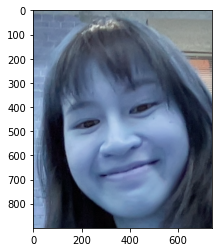

In [5]:
import numpy as np
import cv2
import matplotlib.pyplot as plt

# reads image 'opencv-logo.png' as grayscale
img = cv2.imread('/Users/nichada/Downloads/Screen Shot 2565-03-01 at 17.44.53.png') 
img
plt.imshow(img/255,cmap='gray')

In [6]:
img.shape

(900, 740, 3)

In [7]:
img_resized =cv2.resize(img, (48,48)).reshape((1,48,48,1))

ValueError: cannot reshape array of size 6912 into shape (1,48,48,1)

In [8]:
# reads image 'opencv-logo.png' as rgb
def img_convert(img_path,colour=None):
    img = cv2.imread(img_path,0)
    if colour:
        img = cv2.cvtColor(img,colour)
    else:
        pass
    return img

def show_img(img_path,colour):
    img = img_convert(img_path,colour)
    return plt.imshow(img/255)

In [9]:
IMG_PATH = '/Users/nichada/Downloads/Photo on 1-3-2565 BE at 18.09.jpg'
COLOUR = cv2.COLOR_GRAY2RGB
SHAPE = (224,224)
RESHAPE = (1,224,224,3)
emotion = {0:'anger',1:'contempt',2:'disgust',3:'fear',4:'happiness',
           5:'neutrality',6:'sadness',7:'surprise'}

def predict(img_path,colour,shape,reshape):
    img = img_convert(img_path,colour)
    img_resized = cv2.resize(img, shape).reshape(reshape)
    pred = model.predict(img_resized/255.)[0]
    return emotion[np.argmax(pred)]

predict(IMG_PATH,COLOUR,SHAPE,RESHAPE)

2022-03-04 10:48:16.607184: I tensorflow/compiler/mlir/mlir_graph_optimization_pass.cc:176] None of the MLIR Optimization Passes are enabled (registered 2)


'neutrality'

'happiness'

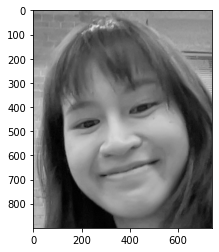

In [10]:
show_img('/Users/nichada/Downloads/Screen Shot 2565-03-01 at 17.44.53.png',COLOUR)
predict('/Users/nichada/Downloads/Screen Shot 2565-03-01 at 17.44.53.png',COLOUR,SHAPE,RESHAPE)

'neutrality'

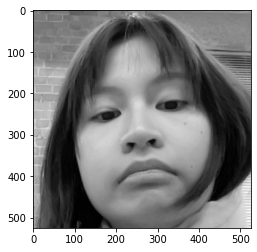

In [11]:
show_img('/Users/nichada/Downloads/Photo on 1-3-2565 BE at 18.09.jpg',COLOUR)
predict('/Users/nichada/Downloads/Photo on 1-3-2565 BE at 18.09.jpg',COLOUR,SHAPE,RESHAPE)

'happiness'

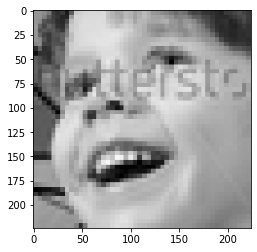

In [12]:
happy_test = '/Users/nichada/Downloads/fer_ckplus_kdef_data66-24-10/test/happiness/img_28825.png'
predict(happy_test,COLOUR,SHAPE,RESHAPE)
show_img(happy_test,COLOUR)
img_convert(happy_test,cv2.COLOR_GRAY2RGB)

predict(happy_test,cv2.COLOR_GRAY2RGB,SHAPE,RESHAPE)


'surprise'

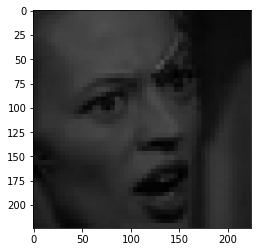

In [13]:
anger_test = '/Users/nichada/Downloads/fer_ckplus_kdef_data66-24-10/test/anger/img_17881.png'
show_img(anger_test,COLOUR)
img_convert(anger_test,cv2.COLOR_GRAY2RGB)

predict(anger_test,cv2.COLOR_GRAY2RGB,SHAPE,RESHAPE)

'sadness'

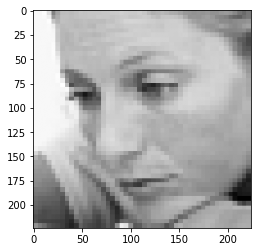

In [14]:
sad_test = '/Users/nichada/Downloads/fer_ckplus_kdef_data66-24-10/test/sadness/img_27588.png'
show_img(sad_test,COLOUR)
img_convert(sad_test,cv2.COLOR_GRAY2RGB)

predict(sad_test,cv2.COLOR_GRAY2RGB,SHAPE,RESHAPE)

In [18]:
test_emotions_path = '/Users/nichada/Downloads/test_emotions'
test_path = 'IMG_0486.heic'

im_path = test_emotions_path + '/' + test_path
im_path

'/Users/nichada/Downloads/test_emotions/IMG_0486.heic'

'anger'

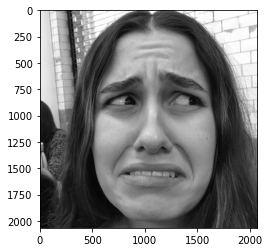

In [30]:
show_img('/Users/nichada/Downloads/test_emotions/IMG_0487.jpeg',cv2.COLOR_GRAY2RGB)
predict('/Users/nichada/Downloads/test_emotions/IMG_0487.jpeg',cv2.COLOR_GRAY2RGB,SHAPE,RESHAPE)

'anger'

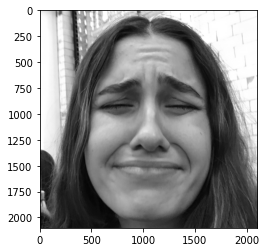

In [32]:
show_img('/Users/nichada/Downloads/test_emotions/IMG_0488.jpeg',cv2.COLOR_GRAY2RGB)
predict('/Users/nichada/Downloads/test_emotions/IMG_0488.jpeg',cv2.COLOR_GRAY2RGB,SHAPE,RESHAPE)

'happiness'

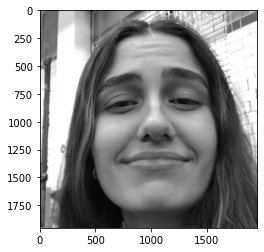

In [33]:
show_img('/Users/nichada/Downloads/test_emotions/IMG_0489.jpeg',cv2.COLOR_GRAY2RGB)
predict('/Users/nichada/Downloads/test_emotions/IMG_0489.jpeg',cv2.COLOR_GRAY2RGB,SHAPE,RESHAPE)

'happiness'

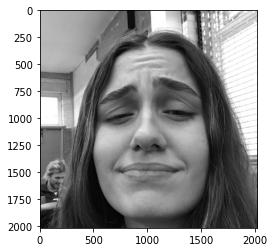

In [38]:
show_img('/Users/nichada/Downloads/test_emotions/IMG_0490.jpeg',cv2.COLOR_GRAY2RGB)
predict('/Users/nichada/Downloads/test_emotions/IMG_0490.jpeg',cv2.COLOR_GRAY2RGB,SHAPE,RESHAPE)

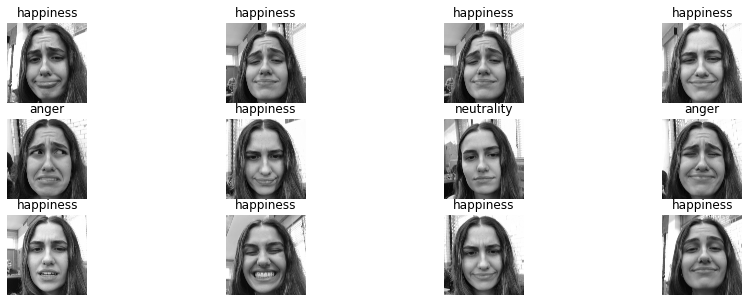

In [65]:
import os

test_emotions_path = '/Users/nichada/Downloads/test_emotions'


plt.figure(figsize=(15,5))
for i,im in enumerate(os.listdir('/Users/nichada/Downloads/test_emotions/')):
    plt.subplot(3,int(len(os.listdir('/Users/nichada/Downloads/test_emotions/'))/3),i+1)
    if '.jpeg' in im:
        im_path = test_emotions_path + '/' + im
    pred = predict(im_path,cv2.COLOR_GRAY2RGB,SHAPE,RESHAPE)
    plt.title(pred)
    show_img(im_path,cv2.COLOR_GRAY2RGB)
    plt.axis('off')

In [55]:
len(os.listdir('/Users/nichada/Downloads/test_emotions/'))

12